In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

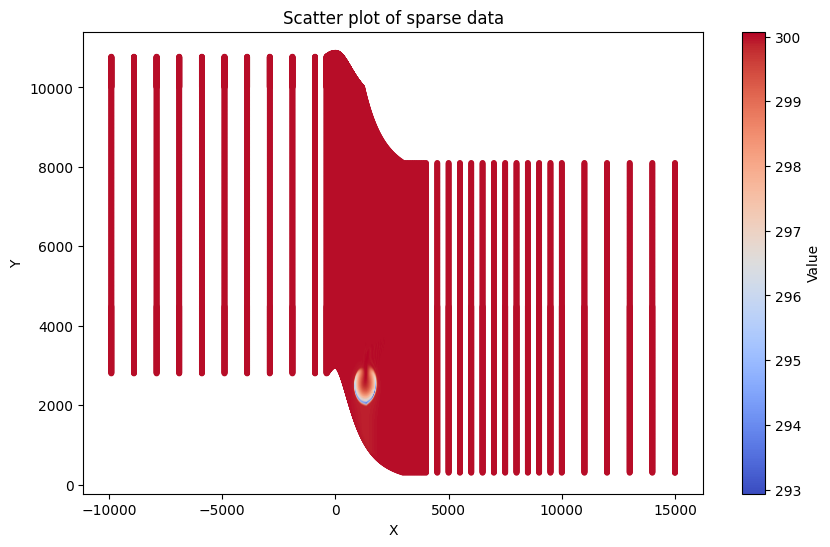

In [12]:
x_coord = []
y_coord = []
vals = []

with open('zz.dat', 'r') as file:
    i = 0
    for line in file:
        i += 1
        if i < 1577024:
            continue
        pl = line.strip().split()
        x_coord.append(float(pl[0]))
        y_coord.append(float(pl[1]))
        vals.append(float(pl[4]))
        if i >= 1774152:
            break


plt.figure(figsize=(10,6))
sc = plt.scatter(x_coord, y_coord, c=vals, cmap='coolwarm', s=10)
plt.colorbar(sc, label="Value")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of sparse data")
plt.show()

C:\Users\jdsan\OneDrive\Documents\Air Bubble Visuals\venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


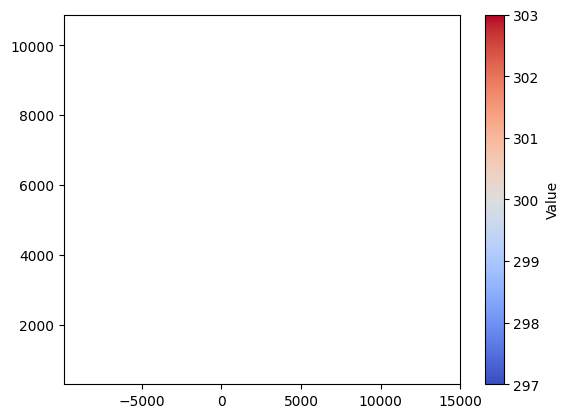

In [5]:
x_min = float('inf')
x_max = 0
y_min = float('inf')
y_max = 0

with open('zz.DAT', 'r') as file:
    tot_lines = 0
    for line in file:
        tot_lines += 1
        parts = line.strip().split()
        x = float(parts[0])
        y = float(parts[1])

        if x > x_max:
            x_max = x
        if x < x_min:
            x_min = x
        
        if y > y_max:
            y_max = y
        if y < y_min:
            y_min = y
        

    width = 328
    length = 601
    depth = tot_lines / 197128
    if depth != round(depth):
        raise ValueError("file does not contain an even amount of visual slices")
    depth = int(depth)

    # reset file pointer to iterate again
    file.seek(0)
    
    frames = []
    for k in range(depth):
        x,y,val = [], [], []
        for i in range(width*length):
            line = file.readline()
            parts = line.strip().split()
            x.append(float(parts[0]))
            y.append(float(parts[1]))
            val.append(float(parts[4]))
        frames.append((np.array(x), np.array(y), np.array(val)))

# Create the plot
fig, ax = plt.subplots()
sc = ax.scatter([], [], c=[], cmap='coolwarm', s=10, vmin=297, vmax=303)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.colorbar(sc, label="Value")




def update(frame_index):
    x, y, val = frames[frame_index]
    sc.set_offsets(np.column_stack((x, y)))
    sc.set_array(val)
    return sc,


ani = animation.FuncAnimation(fig, update, frames=depth, interval=100, blit=False)
plt.show()
            